# Moving Obstacles

[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tum-pbs/PhiFlow/blob/develop/examples/mesh/FVM_Heat.ipynb)

This example runs a heat diffusion simulation on an unstructured mesh.

In [1]:
# %pip install --quiet phiflow
from phi.torch.flow import *
# from phi.flow import *  # If JAX is not installed. You can use phi.torch or phi.tf as well.
from tqdm.notebook import trange

<Figure size 864x360 with 2 Axes>

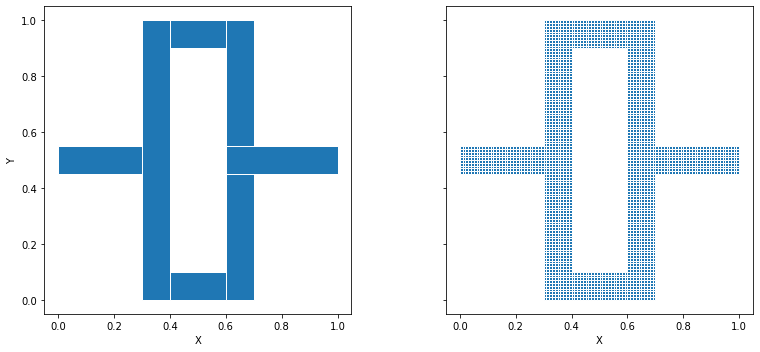

In [2]:
valid = union(
    Box(x=(0, .4), y=(.45, .55)),
    Box(x=(.3, .7), y=(0, .1)),
    Box(x=(.3, .7), y=(.9, 1)),
    Box(x=(.3, .4), y=1),
    Box(x=(.6, .7), y=1),
    Box(x=(.6, 1), y=(.45, .55)),
)
mesh = geom.build_mesh(Box(x=1, y=1), x=100, y=100, obstacles=~valid)
plot(valid, mesh)

In [3]:
@jit_compile
def step(t, dt, conductivity=1.):
    return diffuse.implicit(t, conductivity, dt, correct_skew=False)

In [5]:
boundary = {'x-': 1, 'x+': ZERO_GRADIENT, 'y': ZERO_GRADIENT, 'obstacle': ZERO_GRADIENT}
t0 = Field(mesh, tensor(0), boundary)
t_trj = iterate(step, batch(time=100), t0, dt=.01, range=trange)

  0%|          | 0/100 [00:00<?, ?it/s]

In [7]:
plot(t_trj, animate='time', frame_time=50)